In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
from PIL import Image
from numpy.linalg import inv
import cv2
import time
from tqdm import tqdm

import sys
sys.path.insert(1, '..')
from ITRIP.Configuration import config
2
from DON_Training.DataGenerator_O2O import DataGenerator,loadAllModels,convertToHeatmap,project_real,render,remove_values_from_list
from ITRIP.objects_new import graspnet_train
import matplotlib.pyplot as plt
from ITRIP.Configuration import sceneTypeString


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
dataGenerator = DataGenerator()
models, colors = loadAllModels(path="../DON_data/",loadFile=True)
dataGenerator.setOriginalModelObjects(models, colors)

print (models[0].shape)

(220361, 4)


In [24]:
nTry = 5
totalTime = np.zeros(5)
totalMatchPoint =np.zeros(5)
totalNonMatch = np.zeros(5)
totalSelect =np.zeros(5)


for type_scene in [3,4,5,6,7]:
    for i in  (range (nTry)):
        #type_scene = 7#  np.random.choice([3,4])#,5,6,7])
        augmentationType =   np.random.choice([0,1,2,3])
        #print (i,type_scene,augmentationType)
        start_time = time.time()
        imgA,depthA, imgB,depthB, rawData_1, rawData_2, matches_a, matches_b, _, _, _, _, _, _, nMatchPoint, nNoneMatchPoint   = dataGenerator.generateRandomData(
                            pathToScense="../DON_data/", matchType=0, sceneType=type_scene,
                            augmentationType=augmentationType, debug=True, isEvaluate=True, isLoadUnseen=False)
        end_time = time.time()

#         print (nMatchPoint, nNoneMatchPoint)
#         print (end_time - start_time,"seconds")
#         print (sceneTypeString[type_scene])

        totalTime[type_scene-3] += (end_time - start_time)
        totalMatchPoint[type_scene-3] += nMatchPoint
        totalNonMatch[type_scene-3] += nNoneMatchPoint
        totalSelect[type_scene-3] +=1

        matchImage = Image.fromarray(cv2.cvtColor(cv2.imread("matchPoint_O2O.jpg"),cv2.COLOR_RGB2BGR))
        nonMatchImage =Image.fromarray(cv2.cvtColor(cv2.imread("MaskNonMatch_O2O.jpg"),cv2.COLOR_RGB2BGR))
        backgroundNonMatch = Image.fromarray(cv2.cvtColor(cv2.imread("BackgroundNonMatch_O2O.jpg"),cv2.COLOR_RGB2BGR))
        blindNoneMatch = Image.fromarray(cv2.cvtColor(cv2.imread("BlindNonMatch_O2O.jpg"),cv2.COLOR_RGB2BGR))
    print ("check generate",sceneTypeString[type_scene],"PASSED")
    print (totalTime[type_scene-3]/nTry,"seconds/pair")
#         display(matchImage )
#         display(nonMatchImage)
#         display(backgroundNonMatch)
#         display(blindNoneMatch)
print ("DONE")
totalTime /= nTry
totalMatchPoint/= nTry
totalNonMatch /= nTry

check generate MULTI_DIFFERENT PASSED
1.8921252250671388 seconds/pair
check generate MULTI_SAME PASSED
1.8207969665527344 seconds/pair
check generate MULTI_DIFFERENT_REAL PASSED
1.2169239044189453 seconds/pair
check generate MULTI_SAME_REAL PASSED
1.172763967514038 seconds/pair
check generate MULTI_SIM_REAL PASSED
1.4887131690979003 seconds/pair


[1.89212523 1.82079697 1.2169239  1.17276397 1.48871317]


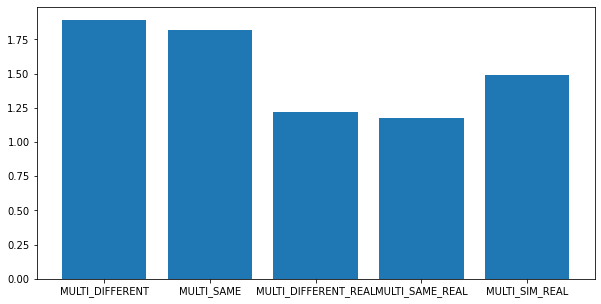

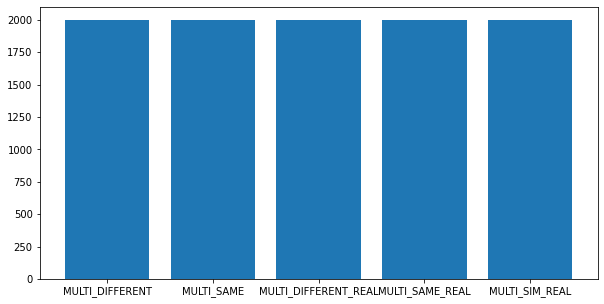

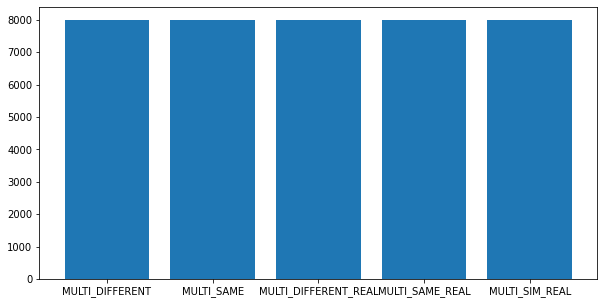

In [28]:
print (totalTime)
fig = plt.figure(figsize = (10, 5))
plt.bar(sceneTypeString[3:8],totalTime)
plt.show()

fig = plt.figure(figsize = (10, 5))
plt.bar(sceneTypeString[3:8],totalMatchPoint)
plt.show()

fig = plt.figure(figsize = (10, 5))
plt.bar(sceneTypeString[3:8],totalNonMatch)
plt.show()